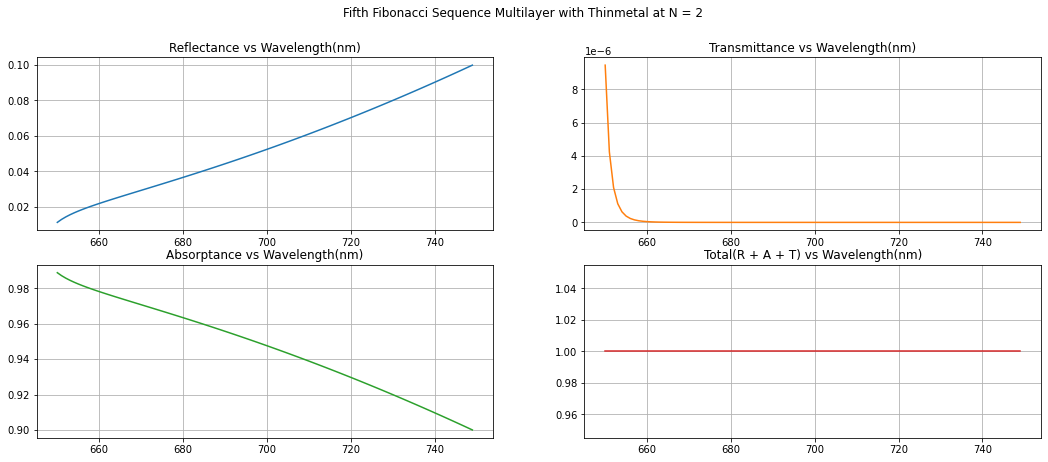

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

lowRefractiveIndex = 1.45
highRefractiveIndex = 4.234
mediumRefractiveIndex = 1.45
airRefractiveIndex = 1.000273
subRefractiveIndex = 1.52
crRefractiveIndex = complex(3.073,-3.383)
defectRefractiveIndex = 1.45
glassRefractiveIndex = 1.458

designWavelength = 700.0
layerThicknessDividerCoefficent = 4.0
lowLayerThickness = designWavelength / (layerThicknessDividerCoefficent * lowRefractiveIndex)
highLayerThickness = designWavelength / (layerThicknessDividerCoefficent * highRefractiveIndex)
mediumLayerThickness = designWavelength / (layerThicknessDividerCoefficent * mediumRefractiveIndex)
airLayerThickness = designWavelength / (layerThicknessDividerCoefficent * airRefractiveIndex)
subLayerThickness = designWavelength / (layerThicknessDividerCoefficent * subRefractiveIndex)
glassLayerThickness = designWavelength / (layerThicknessDividerCoefficent * glassRefractiveIndex)
crLayerThickness = 5.0
defectLayerThickness = designWavelength / (2.0 * defectRefractiveIndex)

totalSystemMatrix = np.ones((2, 2),dtype = complex)
n1Multip = n2Multip = 2
absorptance = []
reflectance = []
transmittance = []

absorptance_SiO2 = []
absorpttance_TiO2 = []
absorptance_GaAs = []

#Testing Purposes
totalTest = [] # totalTest = 1 = R + A + T
sequenceTestChooser = True # True:Fibonacci    False:Thue
sequenceTestWavelenthRangeChooser = range(650,750) if sequenceTestChooser == True  else range(400,1800)

def LayerMatrixCal(dynamicalMatrix, inverseDynamicalMatrix, TranslationalMatrix):
    return dynamicalMatrix.dot(TranslationalMatrix).dot(inverseDynamicalMatrix)

def DynamicalMatrixCal(refractiveIndex):
    dynamicalMatrix = np.ones((2, 2),dtype=complex)
    dynamicalMatrix[1][0] = refractiveIndex
    dynamicalMatrix[1][1] = -refractiveIndex
    return dynamicalMatrix

def InverseDynamicalMatrixCal(dynamicalMatrix):
    return np.linalg.inv(dynamicalMatrix)

def TranslationalMatrixCal(thickness, wavelength, refractiveIndex):
    translationalMatrix = np.zeros((2, 2),dtype = complex)
    phase = 2*math.pi*thickness*refractiveIndex/wavelength
    translationalMatrix[0][0] = complex(math.cos(phase.real)*math.exp(-1*phase.imag),math.sin(phase.real)*math.exp(-1*phase.imag))
    translationalMatrix[1][1] = complex(math.cos(phase.real)*math.exp(phase.imag),-1.0 * math.sin(phase.real)*math.exp(phase.imag))
    return translationalMatrix

def ReflectanceCal(totalSystemMatrix):
    return (abs(totalSystemMatrix[1][0]) / abs(totalSystemMatrix[0][0]))**2

def TransmittanceCal(totalSystemMatrix):
    return (subRefractiveIndex / airRefractiveIndex) * ((1 / abs(totalSystemMatrix[0][0]))**2)

def AbsorptanceCal(totalSystemMatrix):
    reflectance = ReflectanceCal(totalSystemMatrix)
    transmittance = TransmittanceCal(totalSystemMatrix)
    return (1.0 - reflectance - transmittance)

def TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1,n2,mcr):
    fifthFiboSequence = ml.dot(mh).dot(ml).dot(mh).dot(ml).dot(ml).dot(mh).dot(ml)
    leftStructMatrix = fifthFiboSequence
    for i in range(0,n1 - 1):
        leftStructMatrix = leftStructMatrix.dot(fifthFiboSequence)
    rightStructMatrix = fifthFiboSequence
    for k in range(0,n2 - 1):
        rightStructMatrix = rightStructMatrix.dot(fifthFiboSequence)
    return dairinv.dot(mcr).dot(leftStructMatrix).dot(mdef).dot(rightStructMatrix).dot(mh).dot(dsub)

def TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1):
    thueMorseSeqMatrix = (mh.dot(ml).dot(mmed).dot(ml).dot(mmed).dot(mh).dot(ml).dot(mmed)
        .dot(mh).dot(mh).dot(ml).dot(mmed).dot(ml).dot(mmed)
        .dot(mh).dot(mh).dot(ml).dot(mmed).dot(mh).dot(ml).dot(mmed).dot(ml).dot(mmed).dot(mh))
    structMatrix = thueMorseSeqMatrix
    for i in range(0, n1 - 1):
        structMatrix = structMatrix.dot(structMatrix)
    return dairinv.dot(structMatrix).dot(dglass)

#for defectMaterialIndices in [1.45,2.17,3.8]:
#    defectRefractiveIndex = defectMaterialIndices
#    defectLayerThickness = designWavelength / (2.0 * defectRefractiveIndex)
#    absorptance.clear()
#    reflectance.clear()
#    transmittance.clear()
#    totalTest.clear()
#    for wavelength in sequenceTestWavelenthRangeChooser:
#        dl = DynamicalMatrixCal(lowRefractiveIndex)
#        dlinv = InverseDynamicalMatrixCal(dl)
#        pl = TranslationalMatrixCal(lowLayerThickness,wavelength,lowRefractiveIndex)
#        ml = LayerMatrixCal(dl,dlinv,pl)
#    
#        dh = DynamicalMatrixCal(highRefractiveIndex)
#        dhinv = InverseDynamicalMatrixCal(dh)
#        ph = TranslationalMatrixCal(highLayerThickness,wavelength,highRefractiveIndex)
#        mh = LayerMatrixCal(dh,dhinv,ph)
#    
#        dmed = DynamicalMatrixCal(mediumRefractiveIndex)
#        dmedinv = InverseDynamicalMatrixCal(dmed)
#        pmed = TranslationalMatrixCal(mediumLayerThickness,wavelength,mediumRefractiveIndex)
#        mmed = LayerMatrixCal(dmed,dmedinv,pmed)
#    
#        dair = DynamicalMatrixCal(airRefractiveIndex)
#        dairinv = InverseDynamicalMatrixCal(dair)
#    
#        dsub = DynamicalMatrixCal(subRefractiveIndex)
#    
#        ddef = DynamicalMatrixCal(defectRefractiveIndex)
#        ddefinv = InverseDynamicalMatrixCal(ddef)
#        pdef = TranslationalMatrixCal(defectLayerThickness,wavelength,defectRefractiveIndex)
#        mdef = LayerMatrixCal(ddef,ddefinv,pdef)
#    
#        dcr = DynamicalMatrixCal(crRefractiveIndex)
#        dcrinv = InverseDynamicalMatrixCal(dcr)
#        pcr = TranslationalMatrixCal(crLayerThickness,wavelength,crRefractiveIndex)
#        mcr = LayerMatrixCal(dcr,dcrinv,pcr)
#    
#        dglass = DynamicalMatrixCal(glassRefractiveIndex)
#        
#        if(sequenceTestChooser == True):
#            #Coefficients For Fibonacci Sequence
#            totalTest.append(AbsorptanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)) 
#                + ReflectanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr))
#                + TransmittanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
#            absorptance.append(AbsorptanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
#            reflectance.append(ReflectanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
#            transmittance.append(TransmittanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
#        else:
#            #Coefficients For Thue-Morse Sequence
#            totalTest.append(AbsorptanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)) 
#                + ReflectanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip))
#                + TransmittanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
#            absorptance.append(AbsorptanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
#            reflectance.append(ReflectanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
#            transmittance.append(TransmittanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
#
#    if(defectMaterialIndices == 1.45):
#        absorptance_SiO2 = absorptance[:]
#    elif(defectMaterialIndices == 2.17):
#        absorpttance_TiO2 = absorptance[:]
#    elif(defectMaterialIndices == 3.8):
#        absorptance_GaAs = absorptance[:]



for wavelength in sequenceTestWavelenthRangeChooser:
    dl = DynamicalMatrixCal(lowRefractiveIndex)
    dlinv = InverseDynamicalMatrixCal(dl)
    pl = TranslationalMatrixCal(lowLayerThickness,wavelength,lowRefractiveIndex)
    ml = LayerMatrixCal(dl,dlinv,pl)

    dh = DynamicalMatrixCal(highRefractiveIndex)
    dhinv = InverseDynamicalMatrixCal(dh)
    ph = TranslationalMatrixCal(highLayerThickness,wavelength,highRefractiveIndex)
    mh = LayerMatrixCal(dh,dhinv,ph)

    dmed = DynamicalMatrixCal(mediumRefractiveIndex)
    dmedinv = InverseDynamicalMatrixCal(dmed)
    pmed = TranslationalMatrixCal(mediumLayerThickness,wavelength,mediumRefractiveIndex)
    mmed = LayerMatrixCal(dmed,dmedinv,pmed)

    dair = DynamicalMatrixCal(airRefractiveIndex)
    dairinv = InverseDynamicalMatrixCal(dair)

    dsub = DynamicalMatrixCal(subRefractiveIndex)

    ddef = DynamicalMatrixCal(defectRefractiveIndex)
    ddefinv = InverseDynamicalMatrixCal(ddef)
    pdef = TranslationalMatrixCal(defectLayerThickness,wavelength,defectRefractiveIndex)
    mdef = LayerMatrixCal(ddef,ddefinv,pdef)

    dcr = DynamicalMatrixCal(crRefractiveIndex)
    dcrinv = InverseDynamicalMatrixCal(dcr)
    pcr = TranslationalMatrixCal(crLayerThickness,wavelength,crRefractiveIndex)
    mcr = LayerMatrixCal(dcr,dcrinv,pcr)

    dglass = DynamicalMatrixCal(glassRefractiveIndex)
    
    if(sequenceTestChooser == True):
        #Coefficients For Fibonacci Sequence
        totalTest.append(AbsorptanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)) 
            + ReflectanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr))
            + TransmittanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
        absorptance.append(AbsorptanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
        reflectance.append(ReflectanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
        transmittance.append(TransmittanceCal(TotalSystemMatrixFibonacciCal(ml,mh,dairinv,mdef,dsub,n1Multip,n2Multip,mcr)))
    else:
        #Coefficients For Thue-Morse Sequence
        totalTest.append(AbsorptanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)) 
            + ReflectanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip))
            + TransmittanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
        absorptance.append(AbsorptanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
        reflectance.append(ReflectanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))
        transmittance.append(TransmittanceCal(TotalSystemMatrixThueMorseCal(ml,mh,mmed,dglass,dairinv,n1Multip)))







if(sequenceTestChooser == False):
    wavelength = np.arange(400,1800)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,7))
    fig.suptitle('Triple Thue-Morse Array Structure Results at N = ' + str(n1Multip))
    ax1.plot(wavelength,reflectance)
    ax2.plot(wavelength,transmittance, 'tab:orange')
    ax3.plot(wavelength,absorptance, 'tab:green')
    ax4.plot(wavelength,totalTest, 'tab:red')
    ax1.title.set_text('Reflectance vs Wavelength(nm)')
    ax2.title.set_text('Transmittance vs Wavelength(nm)')
    ax3.title.set_text('Absorptance vs Wavelength(nm)')
    ax4.title.set_text('Total(R + A + T) vs Wavelength(nm)')
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
else:
    wavelength = np.arange(650,750)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,7))
    fig.suptitle('Fifth Fibonacci Sequence Multilayer with Thinmetal at N = ' + str(n1Multip))
    ax1.plot(wavelength,reflectance)
    ax2.plot(wavelength,transmittance, 'tab:orange')
    ax3.plot(wavelength,absorptance, 'tab:green')
    ax4.plot(wavelength,totalTest, 'tab:red')
    ax1.title.set_text('Reflectance vs Wavelength(nm)')
    ax2.title.set_text('Transmittance vs Wavelength(nm)')
    ax3.title.set_text('Absorptance vs Wavelength(nm)')
    ax4.title.set_text('Total(R + A + T) vs Wavelength(nm)')
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
    
    #wavelength = np.arange(650,750)
    #plt.figure(figsize=(18,7))
    #plt.title('Absorptance vs Wavelength(nm)')
    #plt.plot(wavelength,absorptance_SiO2)
    #plt.plot(wavelength,absorpttance_TiO2)
    #plt.plot(wavelength,absorptance_GaAs)
    #plt.legend(['SiO2','TiO2','GaAs'])
    #plt.grid(True)
